### **2.1 Data Preprocessing & Cleaning**
Steps:
1. Loading the Heart Disease UCI dataset into a Pandas DataFrame.
2. Conducting Exploratory Data Analysis (EDA) with histograms, correlation heatmaps, and boxplots.
3. Handling missing values.
4. Performing data encoding.
5. Standardizing numerical features using StandardScaler.

Deliverable: Cleaned dataset ready for modeling 👌

---

#### **Import Libraries**

First, we import all necessary libraries for data manipulation, visualization, statistical analysis, and machine learning.

In [ ]:
# Numerical and Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
%matplotlib inline
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Mathematic and Statistics Libraries
import math
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator

# Model Export
import pickle

import warnings
warnings.filterwarnings('ignore')

#### **Color & Style Definitions:**

In [65]:
# Define hex colors
PRIMARY_COLOR = '#1f77b4'
SECONDARY_COLOR = '#124062'
EDGE_COLOR = '#1F1F1F'
GRID_TEXT_COLOR = '#878787'
BACKGROUND_COLOR = '#1F1F1F'

# Set plot style
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = BACKGROUND_COLOR
plt.rcParams['figure.facecolor'] = BACKGROUND_COLOR
plt.rcParams['text.color'] = GRID_TEXT_COLOR
plt.rcParams['axes.labelcolor'] = GRID_TEXT_COLOR
plt.rcParams['xtick.color'] = GRID_TEXT_COLOR
plt.rcParams['ytick.color'] = GRID_TEXT_COLOR
plt.rcParams['grid.color'] = GRID_TEXT_COLOR
plt.rcParams['grid.alpha'] = 0.3

# Set the Seaborn style
sns.set_style("darkgrid", {
    'axes.facecolor': BACKGROUND_COLOR,
    'figure.facecolor': BACKGROUND_COLOR,
    'axes.edgecolor': EDGE_COLOR,
    'grid.color': GRID_TEXT_COLOR,
    'xtick.color': GRID_TEXT_COLOR,
    'ytick.color': GRID_TEXT_COLOR,
    'text.color': GRID_TEXT_COLOR,
    'axes.labelcolor': GRID_TEXT_COLOR,
    'axes.titlecolor': GRID_TEXT_COLOR,
})

**Table with all the features we have in the dataset with description:**
| Feature            | Description                                              | Type        |
|--------------------|----------------------------------------------------------|-------------|
| `age`              | Age in years                                             | Numerical   |
| `sex`              | Gender (1 = male; 0 = female)                            | Categorical - Nominal |
| `cp`               | Chest pain type (1-4)                                    | Categorical - Nominal |
| `trestbps`         | Resting blood pressure (mm Hg)                           | Numerical |
| `chol`             | Serum cholesterol (mg/dl)                                | Numerical |
| `fbs`              | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)    | Categorical - Nominal |
| `restecg`          | Resting electrocardiographic results (0-2)               | Categorical - Nominal |
| `thalach`          | Maximum heart rate achieved                              | Numerical |
| `exang`            | Exercise induced angina (1 = yes; 0 = no)                |  Categorical - Nominal  |
| `oldpeak`          | ST depression induced by exercise                        | Numerical   |
| `slope`            | Slope of the peak exercise ST segment (1-3)              | Categorical - Nominal |
| `ca`               | Number of major vessels (0-3) colored by fluoroscopy     | Categorical - Ordinal   |
| `thal`             | Thalassemia (3,6,7)                                      | Categorical - Nominal |
| `num`              | Diagnosis of heart disease (0 = no; 1,2,3,4 = yes)       | Categorical - Nominal   |

#### **Loading and inspecting the dataset**

We load the dataset from .data file and explore its structure to understand its contents and dimensions.

In [66]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv(r"Instructions & Dataset\heart disease\processed.cleveland.data", header=None, names=column_names, na_values='?')

# Convert target to binary: 0 = no disease, 1 = disease
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

print(f"Shape of the DataFrame: {df.shape}")

print("\n--- First 5 Rows ---")
df.head()

Shape of the DataFrame: (303, 14)

--- First 5 Rows ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### **Exploratory Data Analysis (EDA)**

In [67]:
print("--- Dataset Info ---")
df.info()

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [68]:
print("--- Summary Statistics ---")
df.describe()

--- Summary Statistics ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [69]:
print("--- Check for Missing Values ---\n")
print(df.isnull().sum())

print("\nTotal missing values:", df.isnull().sum().sum())

--- Check for Missing Values ---

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Total missing values: 6


##### **Histogram Distributions for numerical columns**

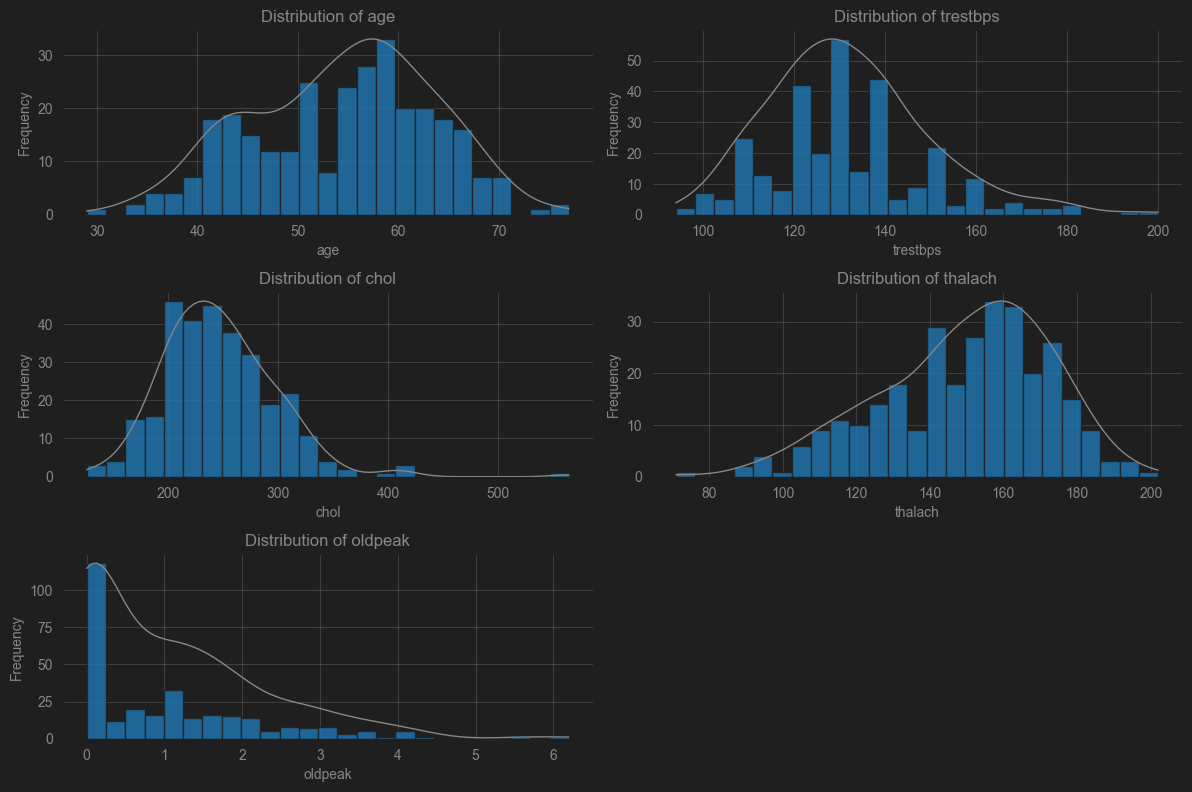

In [70]:
numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

plt.close('all')
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    n, bins, patches = axes[i].hist(df[col].dropna(), bins=25, 
                                    color=PRIMARY_COLOR, edgecolor=EDGE_COLOR, alpha=0.8)

    # KDE
    density = stats.gaussian_kde(df[col].dropna())
    x_vals = np.linspace(df[col].min(), df[col].max(), 100)
    y_vals = density(x_vals)

    # Scale KDE to match histogram height
    hist_max = n.max()
    kde_max = y_vals.max()
    scaling_factor = hist_max / kde_max if kde_max > 0 else 1
    axes[i].plot(x_vals, y_vals * scaling_factor, color=GRID_TEXT_COLOR, linewidth=1)

    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(True)

fig.delaxes(axes[5])

plt.tight_layout(pad=1)
plt.show()


#### **Bar charts for categorical columns**

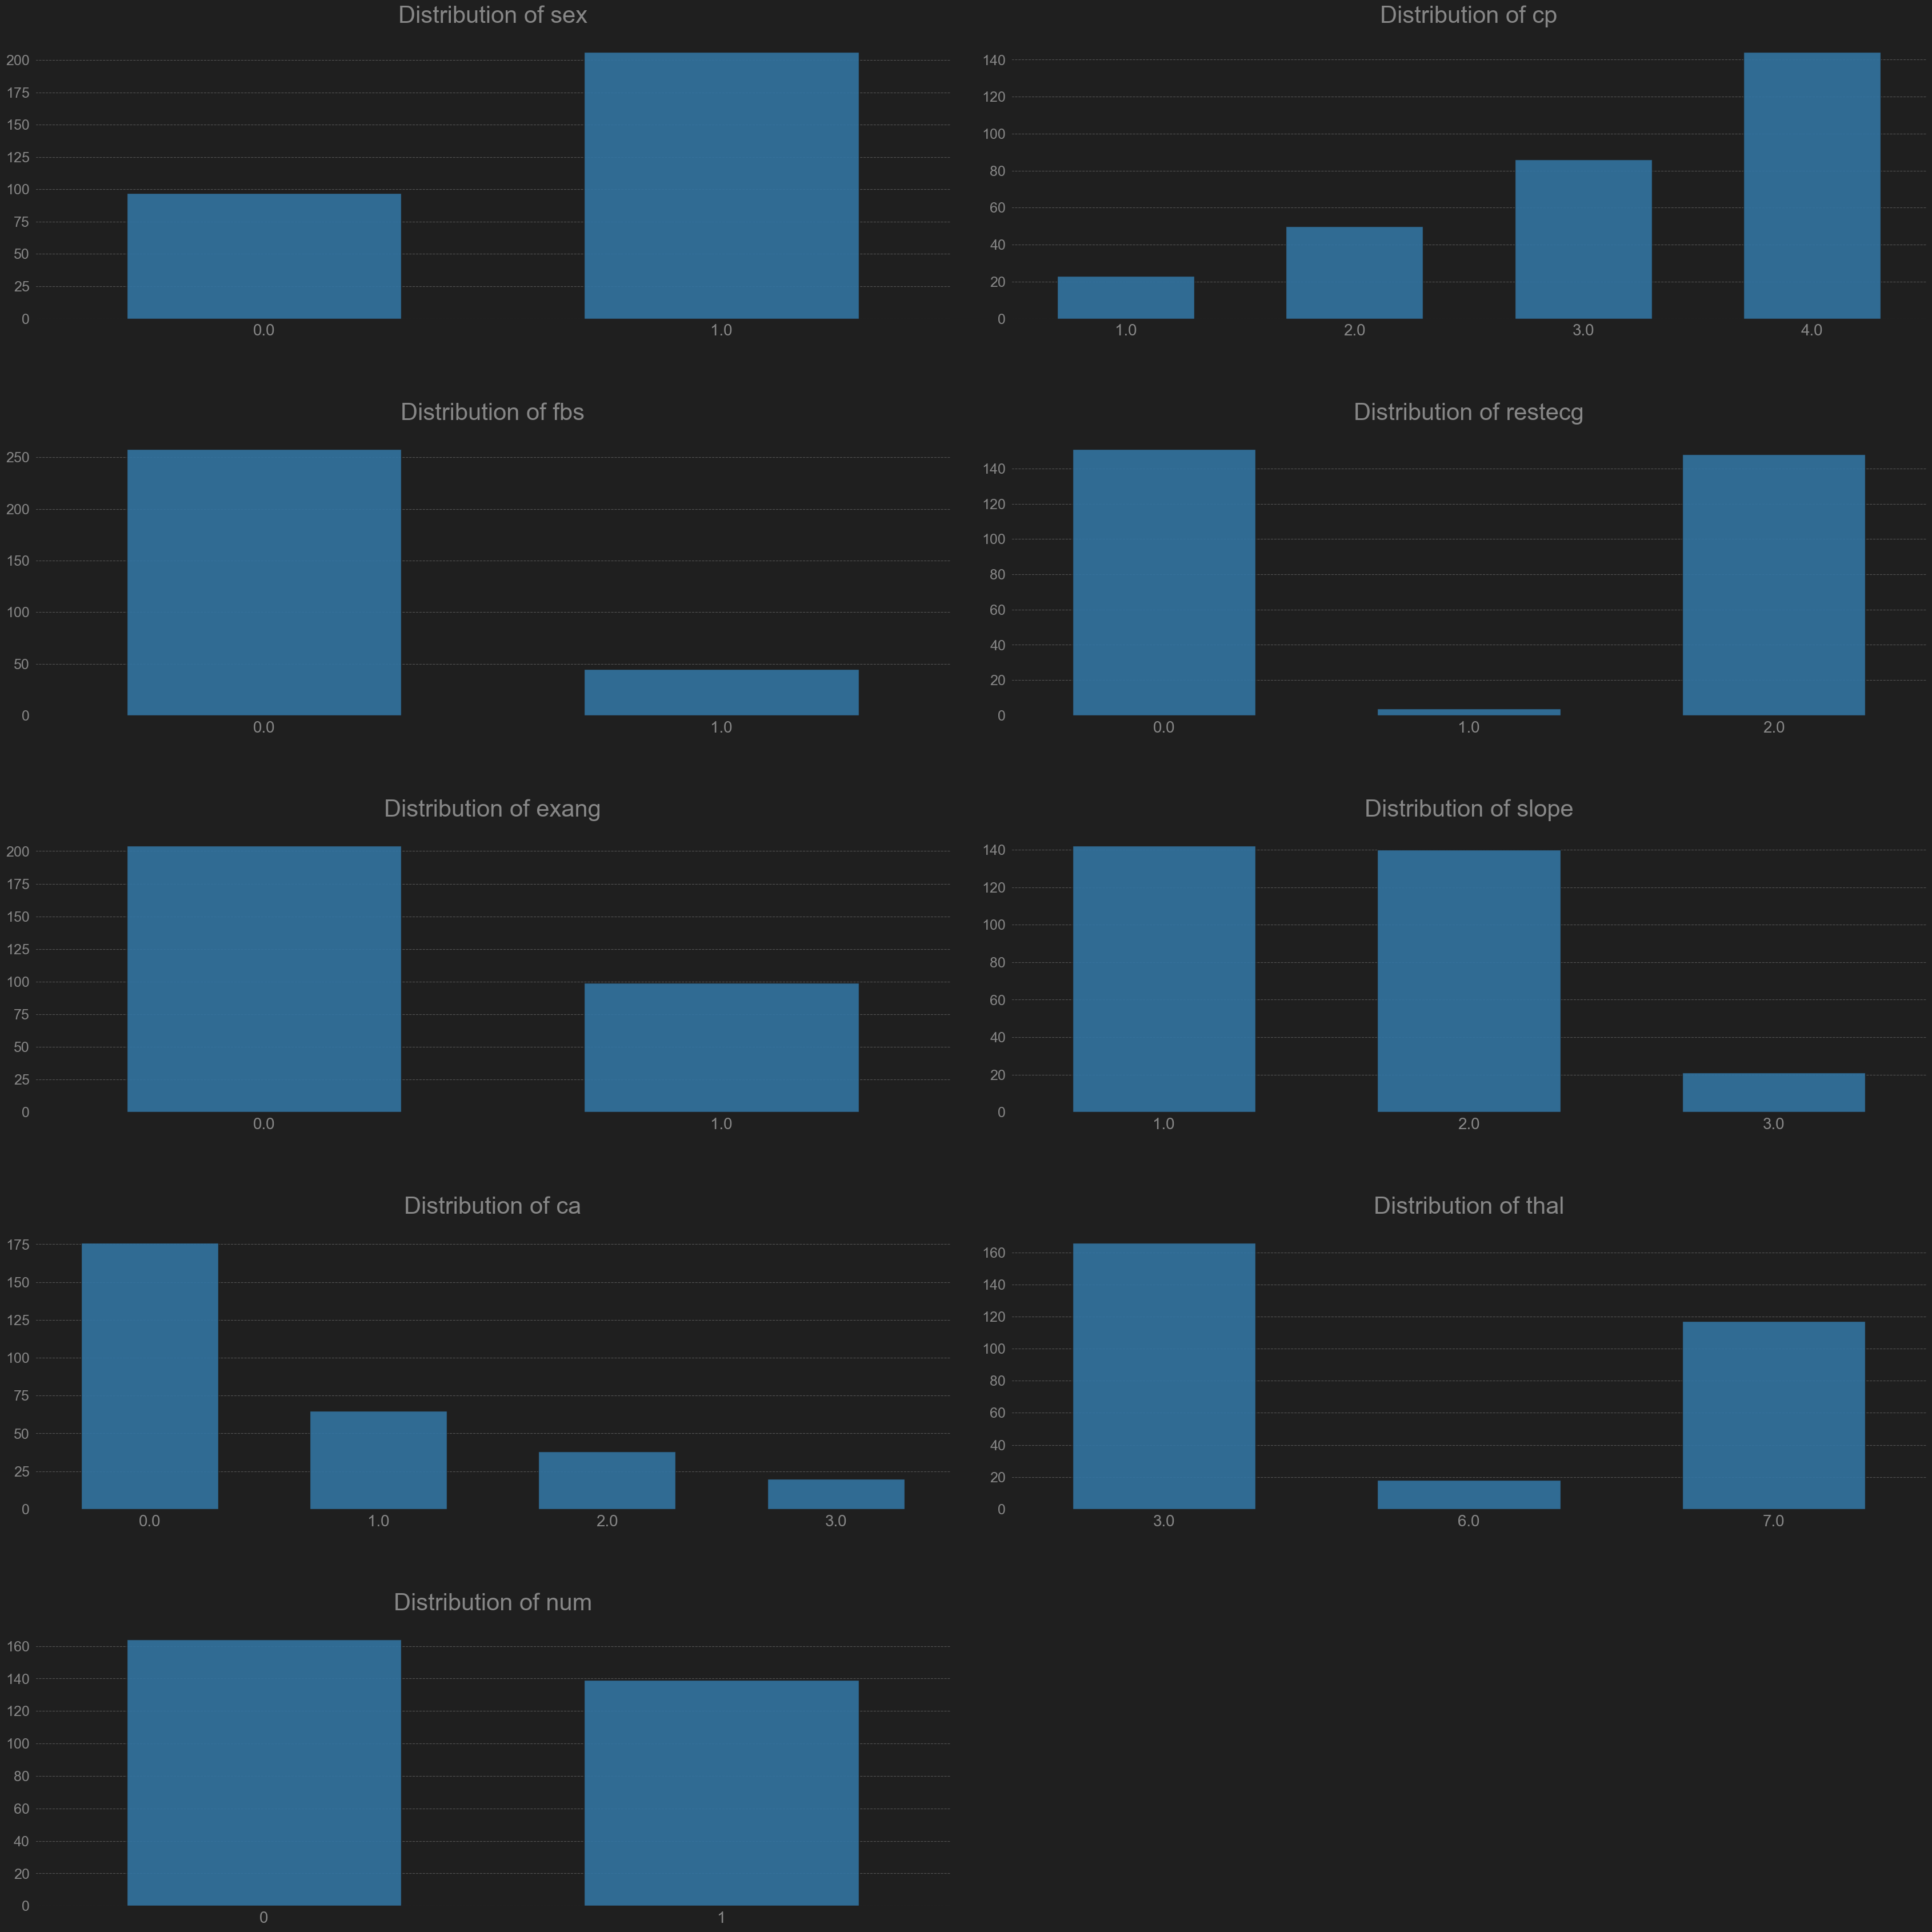

In [71]:
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "num"]

# Number of plots = number of categorical columns
n_cols = len(categorical_cols)
n_rows = math.ceil(n_cols / 2)  # Two plots per row

# Create subplots grid
fig, axes = plt.subplots(n_rows, 2, figsize=(35, n_rows * 7))
axes = axes.flatten()

# Loop over each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(
        x=col,
        data=df,
        ax=axes[i],
        color=PRIMARY_COLOR,
        edgecolor=EDGE_COLOR,
        alpha=0.9,
        width=0.6
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=30, pad=20)
    axes[i].set_xlabel("")  # hide x-axis label
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=18)
    axes[i].set_ylabel("")  # hide y-axis label
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.5)

# Remove any empty subplots (in case of odd number of categorical columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=5.0, w_pad=4.0, h_pad=8.0)
plt.show()


#### **Correlation Heatmaps**

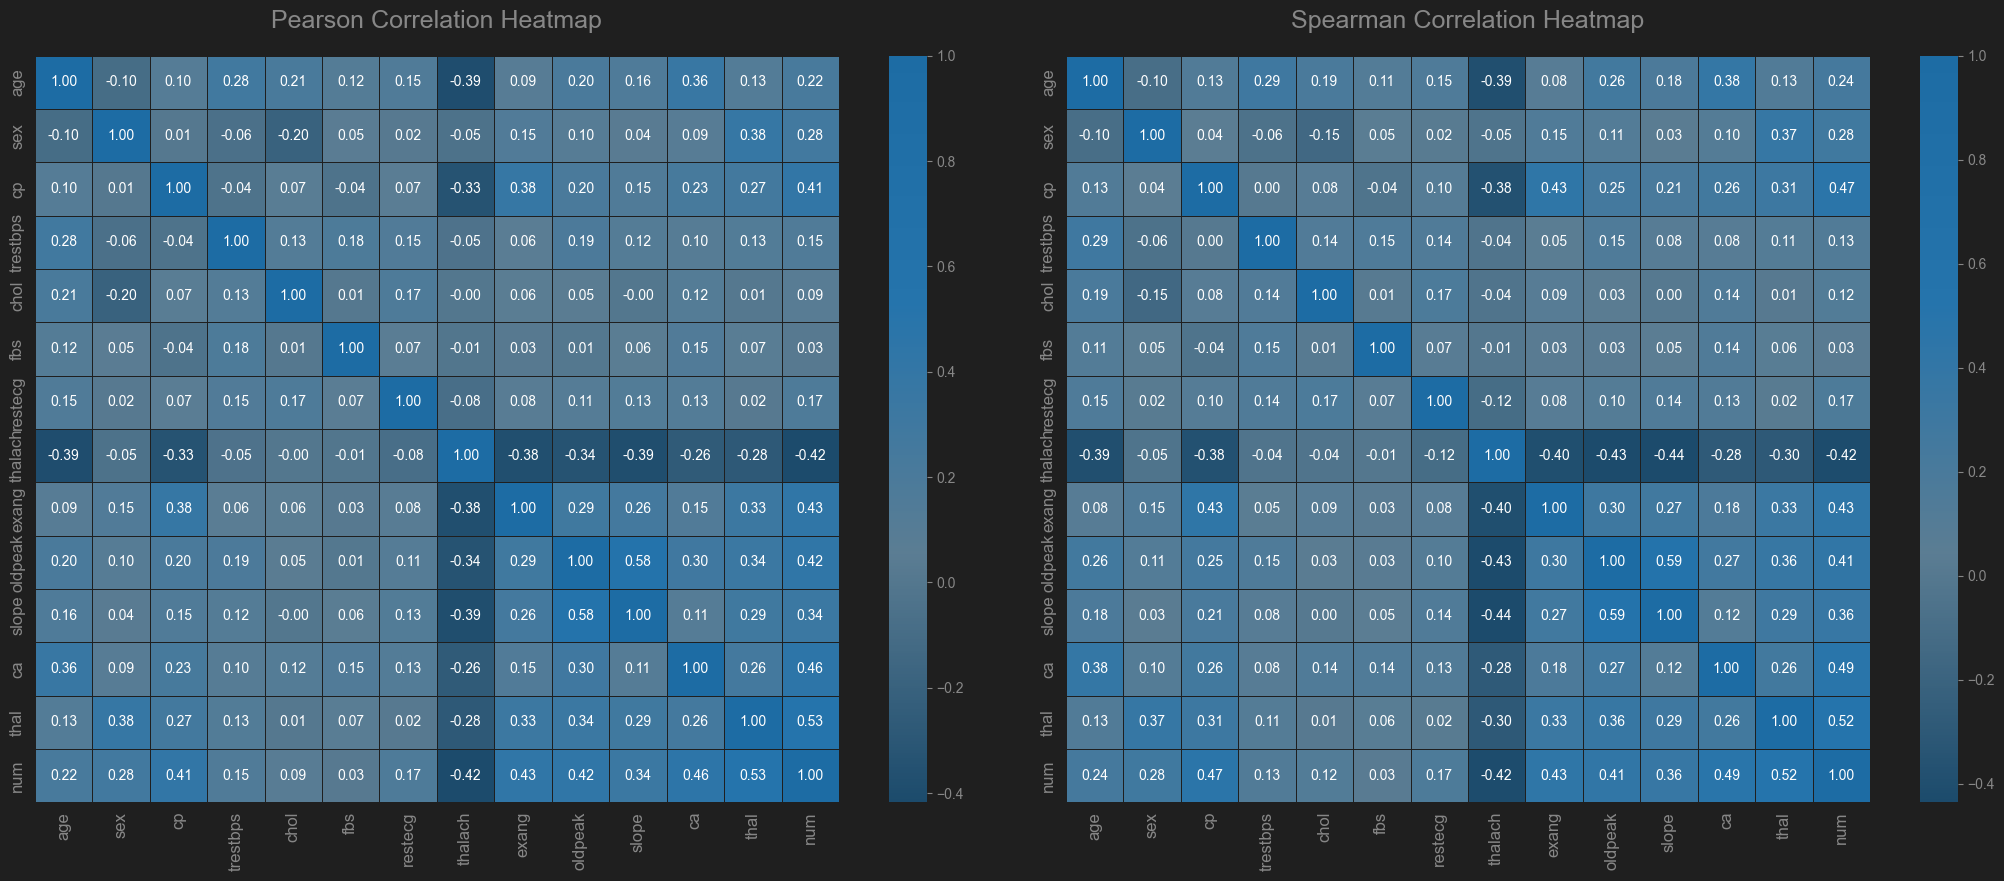

In [72]:
# Compute correlations
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# Create a custom colormap with the specific hex colors
colors = ["#1C4B6C", "#5b7d93", "#2574ac", "#1D6CA4"]
custom_cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=256)

# Pearson Heatmap
sns.heatmap(
    pearson_corr,
    cmap=custom_cmap,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor=EDGE_COLOR,
    cbar=True,
    ax=axes[0],
    annot_kws={"size": 10, "color": "#ffffff"}
)
axes[0].set_title("Pearson Correlation Heatmap", fontsize=18, pad=20)

# Spearman Heatmap
sns.heatmap(
    spearman_corr,
    cmap=custom_cmap,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor=EDGE_COLOR,
    cbar=True,
    ax=axes[1],
    annot_kws={"size": 10, "color": "#ffffff"}
)
axes[1].set_title("Spearman Correlation Heatmap", fontsize=18, pad=20)

# Apply background color
for ax in axes:
    ax.set_facecolor(BACKGROUND_COLOR)
    ax.tick_params(colors=GRID_TEXT_COLOR, labelsize=12)

fig.patch.set_facecolor(BACKGROUND_COLOR)  # overall background
plt.tight_layout(pad=5.0, w_pad=3.0, h_pad=5.0)
plt.show()


#### **Boxplots for outlier analysis (Interactive plots)**

In [73]:
# Set theme
fig_config = {
    'plot_bgcolor': "rgba(0,0,0,0)",   # Transparent plot area
    'paper_bgcolor': "rgba(0,0,0,0)",  # Transparent figure background
    'font': {'color': GRID_TEXT_COLOR, 'size': 12},
    'title': {'x': 0.5, 'xanchor': 'center', 'font': {'size': 16}},
    'height': 400
}

# Loop through numerical columns and create boxplots
for col in numerical_cols:
    fig = px.box(df, 
                 x=col, 
                 title=f'Distribution of {col} with Outliers',
                 color_discrete_sequence=[PRIMARY_COLOR], 
                 points='outliers')  
    
    # Apply styling
    fig.update_layout(**fig_config)
    fig.update_traces(marker=dict(size=9), line=dict(width=2))
    fig.update_xaxes(gridcolor=GRID_TEXT_COLOR, zerolinecolor=EDGE_COLOR)
    
    fig.show()


#### **Data Preprocessing & Cleaning**

In [74]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


##### **Impute 'ca', and 'thal' columns with its MODE**

In [75]:
# .mode() returns a Series. We take the first value in case there's a tie.
ca_mode = df['ca'].mode()[0]

print(f"\nThe most frequent value for 'ca' (number of vessels) is: {ca_mode}")

df['ca'] = df['ca'].fillna(ca_mode)


thal_mode = df['thal'].mode()[0]

print(f"\nThe most frequent value for 'thal' (thallium scan) is: {thal_mode}")

df['thal'] = df['thal'].fillna(thal_mode)


The most frequent value for 'ca' (number of vessels) is: 0.0

The most frequent value for 'thal' (thallium scan) is: 3.0


##### **Verify imputation was successful**

In [76]:
print("Missing values in each column:")
print(df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Total missing values: 0


##### **Define the correct data types for each column**

In [77]:
data_types = {
    'age': 'int64',
    'sex': 'category',
    'cp': 'category',
    'trestbps': 'int64',
    'chol': 'int64',
    'fbs': 'category',
    'restecg': 'category',
    'thalach': 'int64',
    'exang': 'category',
    'oldpeak': 'float64',
    'slope': 'category',
    'ca': 'category',
    'thal': 'category',
    'num': 'int64'
}

df = df.astype(data_types)

# Verify the new data types
print("\n--- DataFrame with Correct Data Types ---")
print(df.dtypes)


--- DataFrame with Correct Data Types ---
age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
num            int64
dtype: object


##### **Data encoding**

In [78]:
# Define the list of nominal categorical features to encode
nominal_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Check the unique values for each categorical feature
for feature in nominal_features:
    unique_vals = df[feature].astype(int).unique()
    print(f"{feature}: {unique_vals}")

sex: [1 0]
cp: [1 4 3 2]
fbs: [1 0]
restecg: [2 0 1]
exang: [0 1]
slope: [3 2 1]
thal: [6 3 7]


In [79]:
# Apply one-hot encoding to the specified nominal features
df = pd.get_dummies(df, columns=nominal_features, drop_first=True, prefix=nominal_features, dtype=int)

# Ordinal categories are already numbers but need to be Converted from 'category' to 'int64'
df['ca'] = df['ca'].astype('int64')

In [80]:
# Check the new shape of the DataFrame
print("DataFrame shape:", df.shape)

# Check the new column names
print("\nNew column names:")
print(df.columns.tolist())

# Get a list of all columns that start with 'cp_' to see the encoding for chest pain as an example
cp_columns = [col for col in df.columns if col.startswith('cp_')]
df[cp_columns].head()

DataFrame shape: (303, 19)

New column names:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'num', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'slope_2.0', 'slope_3.0', 'thal_6.0', 'thal_7.0']


,cp_2.0,cp_3.0,cp_4.0
0,0,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


##### **Standardize numerical features using StandardScaler**

In [81]:
# Select only numerical columns
X_num = df[numerical_cols]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X_nscaled = scaler.fit_transform(X_num)

# Convert back to DataFrame for readability
X_nscaled_df = pd.DataFrame(X_nscaled, columns=numerical_cols)

X_nscaled_df.head()

,age,trestbps,chol,thalach,oldpeak
0,0.948726,0.757525,-0.264900,0.017197,1.087338
1,1.392002,1.611220,0.760415,-1.821905,0.397182
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147
3,-1.932564,-0.096170,0.063974,1.637359,2.122573
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912
